<a href="https://colab.research.google.com/github/saguileran/MD-SCPI/blob/main/NoteBooks/Plots_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Github
%%capture

!rm -r /content/MD-SCPI
!git clone https://github.com/saguileran/MD-SCPI

import sys
!{sys.executable} -m pip install ipympl

In [3]:
#@title Existing temperatures
!ls "MD-SCPI/PDBs/MC/AS4/"

10000K	20000K	4800K	    600K	 box.pdb	 MR.mol2.gz
1200K	2400K	5000K	    9600K	 libela.sub
15000K	300K	5000K_long  AS4.mol2.gz  MR-AS4.mol2.gz


In [4]:
import gzip
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from google.colab import output
import numpy as np
import matplotlib as mpl
from scipy.stats import linregress
import matplotlib.cm as cm
from matplotlib import gridspec
import matplotlib.colors as mcolors

def ReadGz(path):
  #data = pd.read_csv(path, compression='gzip',  header=4, delimiter="  ")[['#', 'Step', 'Unnamed: 6', 'Unnamed: 7', ' RMSD']].rename({'#':'Step', 'Step':'Energy', 'Unnamed: 6':'RMSD', 'Unnamed: 7':'DX', ' RMSD':'DY'}, axis=1)
  file1 = gzip.open(path)
  a = file1.read()

  array, c = [], 0
  text = str(a).split()[11:]
  head = text[:14] # 20 

  for i in range(20,len(text)):
    c += 1
    if '\\n' in text[i]:
      text[i] = text[i].replace("\\n","")
      text[i] = text[i].replace("'","")
      words = [float(word) for word in text[i-c+1:i+1]]
      array.append(words) #text[i-c+1:i+1])
      c = 0

  array = np.array(array)
  data = pd.DataFrame({head[i]:array[:,i] for i in range(len(head))})
  return data

%matplotlib ipympl
output.enable_custom_widget_manager()

In [5]:
#file1 = gzip.open('MD-SCPI/PDBs/MC/AS4/300K/MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz')
#ReadGz('MD-SCPI/PDBs/MC/AS4/300K/MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz')['Step']

In [66]:
temperatures = ['300K', '600K', '1200K', '2400K', '4800K', '5000K']
high_temperatures = ['9600K', '10000K', '15000K', '20000K']

colors = ['gray', 'violet', 'red', 'green', 'orange', 'blue', 'orchid']
several_colors = sorted(mcolors.CSS4_COLORS, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
several_colors = [color for color in several_colors if (color!='white' and color!='snow')]

root_path = 'MD-SCPI/PDBs/MC/'

In [68]:
several_colors#[12]

['black',
 'dimgray',
 'dimgrey',
 'gray',
 'grey',
 'darkgray',
 'darkgrey',
 'silver',
 'lightgray',
 'lightgrey',
 'gainsboro',
 'whitesmoke',
 'rosybrown',
 'lightcoral',
 'indianred',
 'brown',
 'firebrick',
 'maroon',
 'darkred',
 'red',
 'mistyrose',
 'salmon',
 'tomato',
 'darksalmon',
 'coral',
 'orangered',
 'lightsalmon',
 'sienna',
 'seashell',
 'chocolate',
 'saddlebrown',
 'sandybrown',
 'peachpuff',
 'peru',
 'linen',
 'bisque',
 'darkorange',
 'burlywood',
 'antiquewhite',
 'tan',
 'navajowhite',
 'blanchedalmond',
 'papayawhip',
 'moccasin',
 'orange',
 'wheat',
 'oldlace',
 'floralwhite',
 'darkgoldenrod',
 'goldenrod',
 'cornsilk',
 'gold',
 'lemonchiffon',
 'khaki',
 'palegoldenrod',
 'darkkhaki',
 'ivory',
 'beige',
 'lightyellow',
 'lightgoldenrodyellow',
 'olive',
 'yellow',
 'olivedrab',
 'yellowgreen',
 'darkolivegreen',
 'greenyellow',
 'chartreuse',
 'lawngreen',
 'honeydew',
 'darkseagreen',
 'palegreen',
 'lightgreen',
 'forestgreen',
 'limegreen',
 'darkgr

In [7]:
# N, N_high = 10, 31
# #unit, unit2 = np.linspace(0.1, 0.9, N), np.linspace(0.9, 0.2, N)
# unit_high, unit2_high = np.linspace(0.1, 0.9, N_high), np.linspace(0.9, 0.2, N_high)
# #Colors = [cm.Greys(unit), cm.Purples(unit), cm.Reds(unit), cm.Greens(unit), cm.Oranges(unit), cm.Blues(unit)]
# Colors_high = [cm.Greys(unit_high), cm.Purples(unit_high), cm.Reds(unit_high), cm.Greens(unit_high), cm.Oranges(unit_high), cm.Blues(unit_high)]
# 

# for j in range(len(high_temperatures)):
#   for i in range(N_high): Colors_high[j][i][-1]=unit2_high[i]
#   #for k in range(N):      Colors[j][k][-1]=unit2[k]

# def Roots_low(data, threshold):
#   root1 = np.where(np.diff(np.sign(data['RMSD']-threshold)))[0]
#   root1_selected = []
#   for r in root1:
#     selected = r
#     # if data.iloc[r]['RMSD'] > threshold:
#     #   selected = r #root1_selected.append(r)
#     # elif data.iloc[r+1]['RMSD'] > threshold:
#     #   selected = r+1 #root1_selected.append(r+1)
#     # else:
#     #   selected = r-1 #root1_selected.append(r-1)
    
#     index = np.arange(selected-10, selected+10, 1)
#     over  = np.where(data.iloc[index]['RMSD'] > threshold)[0]
#     lower = np.where(data.iloc[index]['RMSD'] < threshold)[0]
#     if len(over)>3 and len(lower)>3:  root1_selected.append(selected)
        
#   #print('selected', root1_selected)
#   candidates = np.split(root1_selected, np.where(np.diff(root1_selected) > 3)[0]+1)
#   selected = [int(np.mean(cand)) for cand in candidates]
#   #print(candidates);    print('selected', selected)
#   #selected = [x for x in candidates if len(x) > min_length]
  
#   root1_selected = np.array(selected)
#   heights = data.iloc[root1_selected]['RMSD']
#   #heights = thresholds[1]*np.ones_like(root1)
  
#   return root1_selected, heights

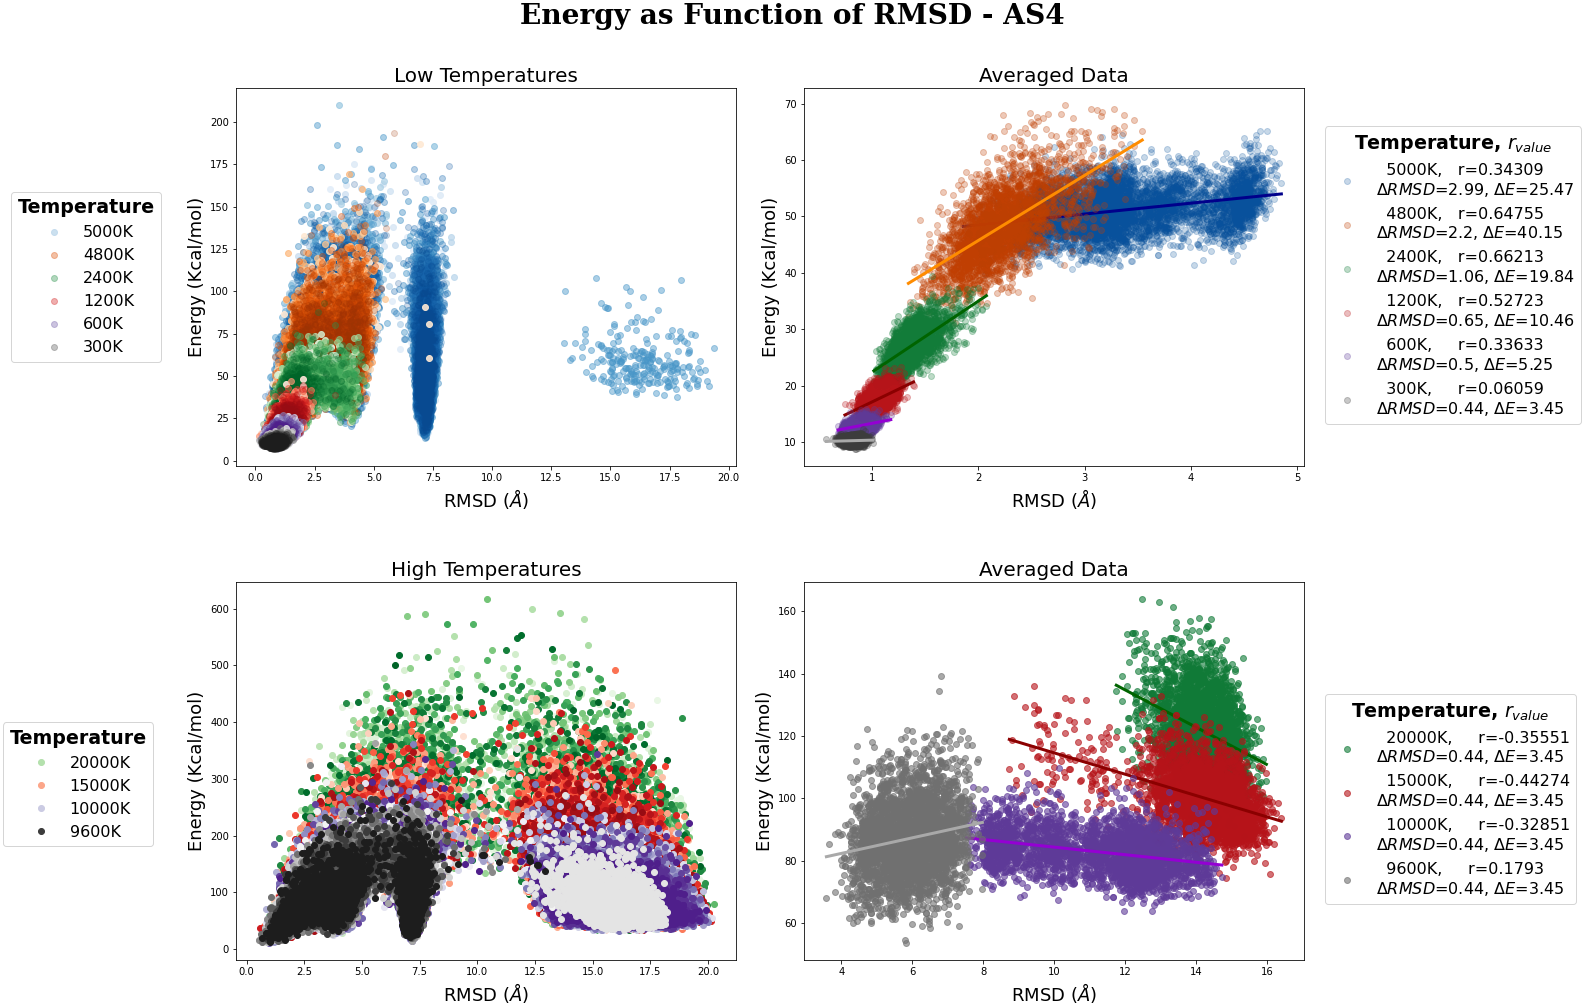

In [69]:
def Plot_Energy(ligand, save=True):
  parameters, high_parameters = pd.DataFrame(), pd.DataFrame()
  path = root_path+'/'+ligand+'/'

  plt.close()
  #fig, axs = plt.subplots(3,2,figsize=(20,21), gridspec_kw={'hspace': 0.3})
  fig = plt.figure(layout="constrained", figsize=(22,14)) # tight_layout=True
  gs = gridspec.GridSpec(2, 2, hspace=0.1, figure=fig)

  N_plot = 5    # is used to plot, number of plots is N_samples%N_plot 
  #ax = fig.add_subplot(gs[2, :])
  axs = np.array([[fig.add_subplot(gs[0,0]),fig.add_subplot(gs[0,1])],  [fig.add_subplot(gs[1,0]),fig.add_subplot(gs[1,1])]])

  c=0
  for i in range(len(temperatures)-1,-1,-1): #list(reversed((temperatures))):
    rmsd, energy = [], []
    gz_files = [f for f in listdir(path+temperatures[i]) if isfile(join(path+temperatures[i], f)) and (('mol2' not in f) and ('.gitignore' not in f))]
    
    N = len(gz_files)
    unit, unit2 = np.linspace(0.1, 0.9, N), np.linspace(0.9, 0.2, N)
    Colors = [cm.Greys(unit), cm.Purples(unit), cm.Reds(unit), cm.Greens(unit), cm.Oranges(unit), cm.Blues(unit), cm.RdPu(unit)]

    for j in range(len(temperatures)):
      for k in range(N):
        Colors[j][k][-1]=unit2[k]

    for j in range(len(gz_files)):
      data = ReadGz(path+temperatures[i]+'/'+gz_files[j])
      rmsd.append(data['RMSD']); energy.append(data['Energy'])
      if j==7:   axs[0,0].plot(data['RMSD'], data['Energy'], 'o', label=temperatures[i], color=Colors[i][j]) #colors[i], alpha=1-0.15*i)
      else:      axs[0,0].plot(data['RMSD'], data['Energy'], 'o',  color=Colors[i][j])

      rmsd_array = np.linspace(min(data['RMSD']), max(data['RMSD']), 1000)
      slope, intercept, r_value, p_value, std_err = linregress(data['RMSD'], data['Energy'])
      # axs[0].plot(rmsd_array, slope*rmsd_array+intercept, color='dark'+colors[i], lw=3)

      value = pd.DataFrame({'temperature':temperatures[i],'slope':slope, 'intercept':intercept, 'r_value':r_value, 
                          'p_value':p_value, 'std_err':std_err, #'deltaE':float(max(energy)-min(energy)), 'deltaRMSD':float(max(rmsd)-min(rmsd)),
                          'E_mean':np.mean(energy), 'RMSD_mean':np.mean(rmsd)}, index=[c])
      parameters = pd.concat([parameters, value], ignore_index=True)
      c += 1
    
      # -------- remove repeated legend labels -------------
      # handles, labels = plt.gca().get_legend_handles_labels()
      # by_label = dict(zip(labels, handles))
      # plt.legend(by_label.values(), by_label.keys())
    
    # -------- average ------------------
    rmsd = np.average(np.array(rmsd), axis=0); energy = np.average(np.array(energy), axis=0)
    slope, intercept, r_value, p_value, std_err = linregress(rmsd, energy)
    rmsd_array = np.linspace(min(rmsd), max(rmsd), 1000)
    if len(temperatures[i]) == 4:
            label = '  '+temperatures[i]+',     r={}\n$\Delta RMSD$={}, $\Delta E$={}'.format(round(r_value,5), round(max(rmsd)-min(rmsd),2), round(max(energy)-min(energy),2))
    else:    label = '  '+temperatures[i]+',   r={}\n$\Delta RMSD$={}, $\Delta E$={}'.format(round(r_value,5), round(max(rmsd)-min(rmsd),2), round(max(energy)-min(energy),2))
    axs[0,1].plot(rmsd, energy, 'o', label=label, color=Colors[i][j-1])#colors[i], alpha=0.5)
    axs[0,1].plot(rmsd_array, slope*rmsd_array+intercept, color='dark'+colors[i], lw=3)
    
  #######################################################################################
  # --------------------------------- high temperatures --------------------------------------------
  c=0
  for i in range(len(high_temperatures)-1,-1,-1): #list(reversed((temperatures))):
    high_rmsd, high_energy = [], []
    gz_files = [f for f in listdir(path+high_temperatures[i]) if isfile(join(path+high_temperatures[i], f)) and (('mol2' not in f) and ('gitignore' not in f))]

    N_high = len(gz_files)
    unit_high, unit2_high = np.linspace(0.1, 0.9, N_high), np.linspace(0.9, 0.2, N_high)
    Colors_high = [cm.Greys(unit_high), cm.Purples(unit_high), cm.Reds(unit_high), cm.Greens(unit_high), cm.Oranges(unit_high), cm.Blues(unit_high)]

    for j in range(len(gz_files)):
      data = ReadGz(path+high_temperatures[i]+'/'+gz_files[j])
      high_rmsd.append(data['RMSD']); high_energy.append(data['Energy'])
      if j==8: axs[1,0].plot(data['RMSD'], data['Energy'], 'o', label=high_temperatures[i], color=Colors_high[i][j])
      else:     axs[1,0].plot(data['RMSD'], data['Energy'], 'o', color=Colors_high[i][j])

      rmsd_array = np.linspace(min(data['RMSD']), max(data['RMSD']), 1000)
      slope, intercept, r_value, p_value, std_err = linregress(data['RMSD'], data['Energy'])

      value = pd.DataFrame({'temperature':temperatures[i],'slope':slope, 'intercept':intercept, 'r_value':r_value, 
                          'p_value':p_value, 'std_err':std_err, #'deltaE':float(max(energy)-min(energy)), 'deltaRMSD':float(max(rmsd)-min(rmsd)),
                          'E_mean':np.mean(energy), 'RMSD_mean':np.mean(rmsd)}, index=[c])
      high_parameters = pd.concat([high_parameters, value], ignore_index=True)

      c += 1
    # -------- average ------------------
    high_rmsd = np.average(np.array(high_rmsd), axis=0); high_energy = np.average(np.array(high_energy), axis=0)
    slope, intercept, r_value, p_value, std_err = linregress(high_rmsd, high_energy)
    rmsd_array = np.linspace(min(high_rmsd), max(high_rmsd), 1000)
    #if len(temperatures[i]) == 4:
    label = '  '+high_temperatures[i]+',     r={}\n$\Delta RMSD$={}, $\Delta E$={}'.format(round(r_value,5), round(max(rmsd)-min(rmsd),2), round(max(energy)-min(energy),2))
    #else:    label = '  '+high_temperatures[i]+',   r={}\n$\Delta RMSD$={}, $\Delta E$={}'.format(round(r_value,5), round(max(rmsd)-min(rmsd),2), round(max(energy)-min(energy),2))
    axs[1,1].plot(high_rmsd, high_energy, 'o', label=label, color=Colors_high[i][j-3], alpha=0.6)#colors[i], alpha=0.5)
    axs[1,1].plot(rmsd_array, slope*rmsd_array+intercept, color='dark'+colors[i], lw=3)

  # ----------- legends, labels and titles for each axis ----------------
  axs[0,0].set_ylabel('Energy (Kcal/mol)', fontsize='18'); axs[0,0].set_xlabel('RMSD ($\AA$)', fontsize='18'); 
  axs[0,0].legend(title='Temperature', bbox_to_anchor=(-.15, .725), fontsize='16', title_fontproperties={'weight':'bold', 'size':'19'}, borderaxespad=0.)
  axs[0,0].set_title('Low Temperatures', fontsize='20', fontweight='normal')
  #plt.ylim((0, 100)); plt.xlim((0, 10))

  #axs[1].sharex(axs[0,0])
  axs[0,1].set_xlabel('RMSD ($\AA$)', fontsize='18'); axs[0,1].set_ylabel('Energy (Kcal/mol)', fontsize='18')
  axs[0,1].legend(title='Temperature, $r_{value}$', bbox_to_anchor=(1.025, 0.92), fontsize='16', title_fontproperties={'weight':'bold', 'size':'19'})
  axs[0,1].set_title('Averaged Data', fontsize='20', fontweight='normal')

  axs[1,0].set_xlabel('RMSD ($\AA$)', fontsize='18'); axs[1,0].set_ylabel('Energy (Kcal/mol)', fontsize='18')
  axs[1,0].legend(title='Temperature', bbox_to_anchor=(-.15, .65), fontsize='16', title_fontproperties={'weight':'bold', 'size':'19'})
  axs[1,0].set_title('High Temperatures', fontsize='20', fontweight='normal')

  axs[1,1].set_xlabel('RMSD ($\AA$)', fontsize='18'); axs[1,1].set_ylabel('Energy (Kcal/mol)', fontsize='18')
  axs[1,1].legend(title='Temperature, $r_{value}$', bbox_to_anchor=(1.025, 0.725), fontsize='16', title_fontproperties={'weight':'bold', 'size':'19'})
  axs[1,1].set_title('Averaged Data', fontsize='20', fontweight='normal')

  plt.suptitle('Energy as Function of RMSD - {}\n'.format(ligand), fontsize='28', fontweight='bold', x=0.5,  fontfamily='serif') #MC Simulation with LiBELa \n
  if save is True: fig.savefig("./MC_energies.png", transparent=True)#, bbox_inches='tight')

  return fig, parameters, high_parameters

fig, parameters, high_parameters =  Plot_Energy('AS4')

In [11]:
parameters

,temperature,slope,intercept,r_value,p_value,std_err,E_mean,RMSD_mean
0,5000K,1.788622,42.783045,0.206626,7.366316e-59,0.109360,53.339358,5.901925
1,5000K,2.248153,41.988231,0.287192,2.748592e-114,0.096818,52.361659,5.040618
2,5000K,13.354350,20.080034,0.647533,0.000000e+00,0.202924,51.289782,4.085918
3,5000K,3.017963,41.739267,0.319904,7.790823e-143,0.115411,51.408020,3.894756
4,5000K,3.025988,40.476541,0.337725,5.654550e-160,0.108894,51.268235,3.792116
...,...,...,...,...,...,...,...,...
76,300K,1.149966,9.294271,0.140234,1.201294e-14,0.148287,10.256802,0.818428
77,300K,0.778827,9.537000,0.095860,1.437561e-07,0.147701,10.245395,0.818894
78,300K,0.798113,9.544075,0.101472,2.548883e-08,0.142908,10.239364,0.818817
79,300K,0.577047,9.785477,0.071372,9.131331e-05,0.147284,10.240898,0.817891


In [12]:
high_parameters

,temperature,slope,intercept,r_value,p_value,std_err,E_mean,RMSD_mean
0,2400K,-6.401936,215.849036,-0.351914,3.515288e-88,0.310992,10.240653,0.818284
1,2400K,-5.549712,200.805315,-0.364532,6.006536e-95,0.258915,10.240653,0.818284
2,2400K,-5.459999,200.797666,-0.368306,4.948296e-97,0.251717,10.240653,0.818284
3,2400K,-7.370601,229.513351,-0.346237,3.098510e-85,0.364741,10.240653,0.818284
4,2400K,-5.052035,191.523333,-0.335876,5.140903e-80,0.258749,10.240653,0.818284
...,...,...,...,...,...,...,...,...
98,300K,3.637557,68.067144,0.220551,2.260257e-34,0.293803,10.240653,0.818284
99,300K,3.407254,70.196661,0.202115,5.035569e-29,0.301531,10.240653,0.818284
100,300K,2.583898,72.754577,0.153446,2.883791e-17,0.303899,10.240653,0.818284
101,300K,3.584968,71.198456,0.202779,3.298446e-29,0.316176,10.240653,0.818284


CPU times: user 7.18 s, sys: 260 ms, total: 7.44 s
Wall time: 7.58 s


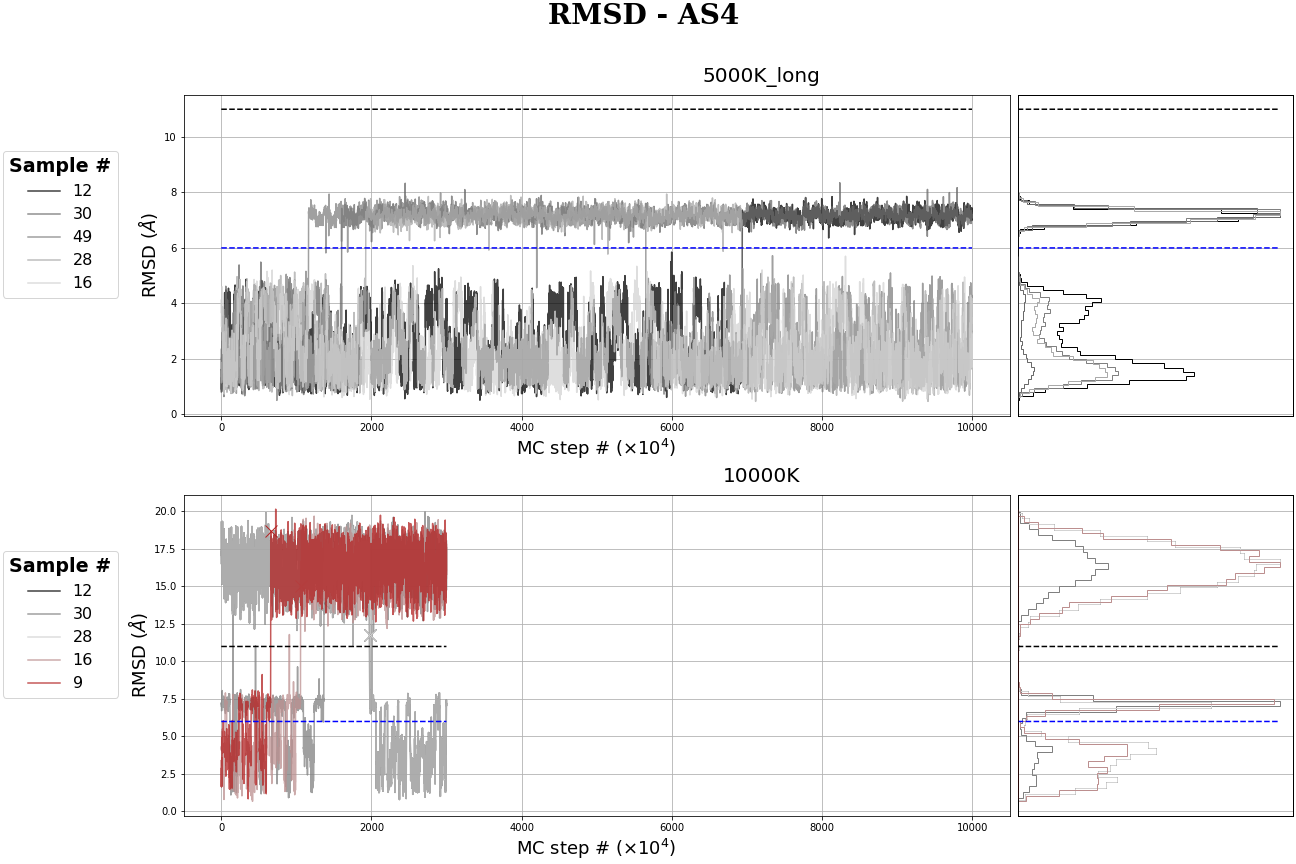

In [71]:
%%time 

def Roots(data, threshold):
  roots, types = [], []
  root1 = np.where(np.diff(np.sign(data['RMSD']-threshold)))[0]
  for r in root1:
    if data.iloc[r]['RMSD'] > threshold:      selected = r
    elif data.iloc[r+1]['RMSD'] > threshold:  selected = r+1
    else:                                     selected = r-1 
    
    index = np.arange(selected-10, selected+10, 1)
    over  = np.where(data.iloc[index]['RMSD'] > threshold)[0]
    lower = np.where(data.iloc[index]['RMSD'] < threshold)[0]
    if len(over)>3 and len(lower)>3:  
      roots.append(selected)
      next = np.where(data.iloc[np.arange(selected,selected+5,1)]['RMSD'] > threshold)[0]
      if len(next)>2:   tp = 'binding'
      elif len(next)<3: tp = 'unbinding'
      else:             tp = ''
      types.append(tp)

  roots = np.array(roots)
  heights = data.iloc[roots]['RMSD'].values
  #heights = thresholds[1]*np.ones_like(root1)
  
  return roots, heights, types

def Plot_RMSD(ligand, temperatures, N_plot=6, save=True, bins=100, bins_cum=50, thresholds=[6,11]):
  plt.close()
  #fig, axs = plt.subplots(len(temperatures),1, figsize=(15,6*len(temperatures)), layout="constrained", gridspec_kw={'hspace': 0.1})
  fig = plt.figure(figsize=(18,6*len(temperatures)), layout="constrained")
  gs0 = gridspec.GridSpec(len(temperatures), 1, figure=fig, hspace=0.3)

  # ----------------------------------------- cortisol -----------------------------------------
  path = root_path+'/'+ligand+'/'
  all_data = pd.DataFrame()
  axs = []
  #,  roots, datas, all_types = [], [], [], []#pd.DataFrame()
  selected = np.linspace(0,30,1)
  counter = 0

  for i in range(len(temperatures)):
    c = 0
    gs = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs0[i,0], wspace=0.025)
    ax_main = plt.subplot(gs[0:3, :3])
    axs.append(ax_main)
    ax_yDist = plt.subplot(gs[:1, 3],sharey=ax_main)
    ax_main.grid(True); ax_yDist.grid(axis='y')

    gz_files = [f for f in listdir(path+temperatures[i]) if isfile(join(path+temperatures[i], f)) and (('mol2' not in f) and ('.gitignore' not in f))]
    #print(gz_files[0], gz_files)
    #gz_files = np.concatenate([[gz_files[0]], gz_files])
    #print(gz_files)
    for j in np.arange(0,5,1):#0,len(gz_files), N_plot): #:  range(len(gz_files))     
      data = ReadGz(path+temperatures[i]+'/'+gz_files[j])
      #if j%N_plot==1: 
      ax_main.plot(1+data.index, data['RMSD'], '-', label=gz_files[j].split('_')[1], alpha=0.75, ms=3, color=several_colors[c])

      ax_yCumDist = ax_yDist.twiny()
      ax_yCumDist.hist(data['RMSD'],bins=bins_cum,cumulative=False,histtype='step',density=True,align='mid',orientation='horizontal', lw=1, color=several_colors[c])#, alpha=1)
      #ax_yCumDist.text(0.5, 0.5, str(j), color=several_colors[c])
      
      ax_yCumDist.tick_params(top=False, labeltop=False, left=False, labelleft=False, bottom=False, labelbottom=False)
      ax_yDist.tick_params(top=False, labeltop=False, left=False, labelleft=False, bottom=False, labelbottom=False)

      # -------------------------------------------- looking for un/binding dots --------------------------------------------
      root, heights, types = Roots(data, thresholds[1])
      ax_main.plot(root+1, heights, 'x', alpha=1, ms=12, color=several_colors[c]) #color='b')#several_colors[c]) #data.iloc[root1]['RMSD']

      #roots.append(root); datas.append(data);  all_types.append(types)
      #print(len(types), len(root), counter)
      #if len(types)!=0:
      dt = pd.DataFrame({'temperature':temperatures[i], 'sample':gz_files[j].split('_')[1], 'j':j, 'index':[root], 'type':[types], 'heights':[heights]}, index=[counter]) # , , 'data':data
      all_data = pd.concat([all_data, dt], ignore_index=True)
      counter += 1 
        
      c += len(several_colors)//len(gz_files)

    # ------------------------------------------ thresholds ------------------------------------------
    ax_main.plot(thresholds[0]*np.ones_like(data['RMSD']), '--b');    ax_main.plot(thresholds[1]*np.ones_like(data['RMSD']), '--k')
    ax_yCumDist.plot(thresholds[0]*np.ones_like(data['RMSD']), '--b');    ax_yCumDist.plot(thresholds[1]*np.ones_like(data['RMSD']), '--k')
    
    ax_main.set_title(temperatures[i], fontsize='20', fontweight='normal', x=0.7, y=1.02)
    ax_main.set_ylabel('RMSD ($\AA$)', fontsize='18'); ax_main.set_xlabel(r'MC step # ($\times 10^4$)', fontsize='18')
    ax_main.legend(title='Sample #', bbox_to_anchor=(-0.07, 0.85), fontsize='16', title_fontproperties={'weight':'bold', 'size':'19'})
    #ax_main.set_xlim((0, 3000));     ax_main.set_ylim((0, 8.5))
    #if i!=0: ax_main.sharex(axs[0])

  [axs[i].sharex(axs[0]) for i in range(len(axs)) if i!=0];
  plt.suptitle('RMSD - {} \n'.format(ligand), fontsize='28', fontweight='bold', x=0.5,  fontfamily='serif')
  if save is True: fig.savefig("./MC_RMSD.png", transparent=True)#, bbox_inches='tight')

  return fig, all_data # roots, datas, all_types, 

fig, data_MC = Plot_RMSD('AS4', ['5000K_long', '10000K'], N_plot=6) 

In [72]:
data_MC#.head()#[['type']].values

,temperature,sample,j,index,type,heights
0,5000K_long,12,0,[],[],[]
1,5000K_long,30,1,[],[],[]
2,5000K_long,49,2,[],[],[]
3,5000K_long,28,3,[],[],[]
4,5000K_long,16,4,[],[],[]
5,10000K,12,0,[1974],[unbinding],[11.796]
6,10000K,30,1,[1366],[binding],[13.872]
7,10000K,28,2,[1974],[unbinding],[11.796]
8,10000K,16,3,[1055],[binding],[15.013]
9,10000K,9,4,[658],[binding],[18.713]


In [40]:
# for i in range(81):
#   print(data_MC.iloc[i]['temperature'], data_MC.iloc[i]['sample'], data_MC.iloc[i]['type'])

In [37]:
data_MC.iloc[0]['temperature']#.values

'5000K_long'

In [ ]:
# plt.close()
# fig = plt.figure(figsize=(12,7))

# parameters = pd.DataFrame()

# for i in range(len(temperatures)-1,-1,-1):#list(reversed((temperatures))):
#   rmsd, energy = [], []
#   for file in gz_files:
#     data = ReadGz(path+temperatures[i]+'/'+file)
#     rmsd.append(data['RMSD']); energy.append(data['Energy'])
#     #plt.plot(data['RMSD'], data['Energy'], 'o', label=temp)
  
#   rmsd = np.average(np.array(rmsd), axis=0); energy = np.average(np.array(energy), axis=0)
#   slope, intercept, r_value, p_value, std_err = linregress(rmsd, energy)

#   value = pd.DataFrame({'temperature':temperatures[i],'slope':slope, 'intercept':intercept, 'r_value':r_value, 
#                         'p_value':p_value, 'std_err':std_err, 'deltaE':max(energy)-min(energy), 'deltaRMSD':max(rmsd)-min(rmsd),
#                         'E_mean':np.mean(energy), 'RMSD_mean':np.mean(rmsd)}, index=[i])
#   parameters = pd.concat([parameters, value], ignore_index=True)

#   rmsd_array = np.linspace(min(rmsd), max(rmsd), 1000)
#   if len(temperatures[i]) == 4:
#            label = '  '+temperatures[i]+',     r={}\n$\Delta RMSD$={}, $\Delta E$={}'.format(round(r_value,5), round(max(rmsd)-min(rmsd),2), round(max(energy)-min(energy),2))
#   else:    label = '  '+temperatures[i]+',   r={}\n$\Delta RMSD$={}, $\Delta E$={}'.format(round(r_value,5), round(max(rmsd)-min(rmsd),2), round(max(energy)-min(energy),2))
  
#   plt.plot(rmsd, energy, 'o', label=label, color=colors[i], alpha=0.5)
#   plt.plot(rmsd_array, slope*rmsd_array+intercept, color='dark'+colors[i], lw=3)
  
# plt.xlabel('RMSD ($\AA$)', fontsize='18'); plt.ylabel('Energy (Kcal/mol)', fontsize='18')
# plt.legend(title='Temperature, $r_{value}$', bbox_to_anchor=(1.025, .85), fontsize='16', title_fontproperties={'weight':'bold', 'size':'19'})
# plt.title('Average MC Data', fontsize='20', fontweight='bold')
# #plt.ylim((0, 100)); plt.xlim((0, 10))


# fig.tight_layout()